In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
index_dic = {
    0: "나이/age",
    1: "성별/sex",
    12:"코너비",
    13:"입너비",
    14:"아래턱사이너비",
    15:"코높이",
    16:"코길이",
    18:"코뿌리턱끝수직길이",
    19:"코뿌리코끝수직길이",
    45:"귀구슬입술직선길이"
}

df = pd.read_excel (r".\2010_6th_sort_translated.xlsx")
col = list(index_dic.values())

df = df.dropna()
df.reset_index(inplace = True,drop = True)
df_features = df[col[3:]]
df_features.reset_index(inplace = True,drop = True)
normalized_df=df_features-df_features.mean()

In [44]:
# Statistics description
df_features.describe()

,코너비,입너비,아래턱사이너비,코높이,코길이,코뿌리턱끝수직길이,코뿌리코끝수직길이,귀구슬입술직선길이
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.00000
mean,35.141723,51.299951,123.431353,12.853603,51.131305,112.672882,35.420594,137.28666
std,3.874189,8.194956,11.979103,2.435991,3.964258,7.764659,4.156997,13.11076
min,23.400000,27.600000,80.000000,5.000000,39.600000,92.000000,22.000000,110.00000
25%,32.425000,45.100000,115.000000,11.000000,48.025000,107.225000,32.100000,129.00000
50%,35.000000,52.000000,124.000000,13.000000,51.000000,112.650000,35.000000,134.70000
75%,38.000000,57.000000,131.700000,14.400000,54.000000,118.000000,38.000000,141.37500
max,56.100000,78.000000,165.800000,23.000000,65.000000,143.000000,50.000000,191.10000


In [45]:
# Statistics description 
df.groupby("성별/sex").describe()

나이/age                                                         코높이  \
         count       mean        std   min   25%   50%   75%   max   count   
성별/sex                                                                       
남       1040.0  44.154808  14.441748  20.0  31.0  44.0  57.0  69.0  1040.0   
여       1014.0  44.474359  14.420728  20.0  32.0  45.0  57.0  69.0  1014.0   

                   ...   입너비       아래턱사이너비                               \
             mean  ...   75%   max   count        mean        std   min   
성별/sex             ...                                                    
남       13.621635  ...  60.0  78.0  1040.0  127.497692  11.455185  90.0   
여       12.065878  ...  55.0  71.0  1014.0  119.260750  11.038406  80.0   

                                    
          25%    50%    75%    max  
성별/sex                              
남       120.0  128.0  135.4  161.0  
여       111.0  120.0  127.6  165.8  

[2 rows x 368 columns]

C:\Users\ZAIO\.conda\envs\cv2\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ZAIO\.conda\envs\cv2\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ZAIO\.conda\envs\cv2\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ZAIO\.conda\envs\cv2\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)


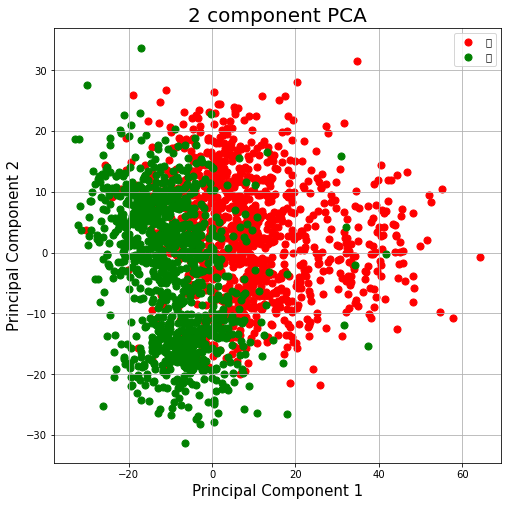

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['남', '여']
colors = ['r', 'g', 'b']
for target, color in zip(['남','여'],colors):
    indicesToKeep = df['성별/sex'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


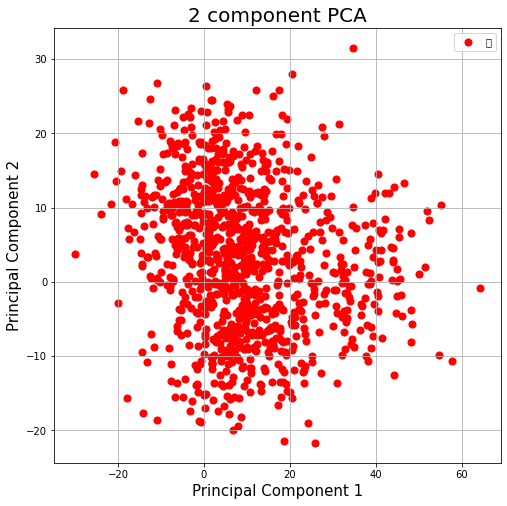

In [47]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['남', '여']
colors = ['r', 'g', 'b']
for target, color in zip(['남'],colors):
    indicesToKeep = df['성별/sex'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


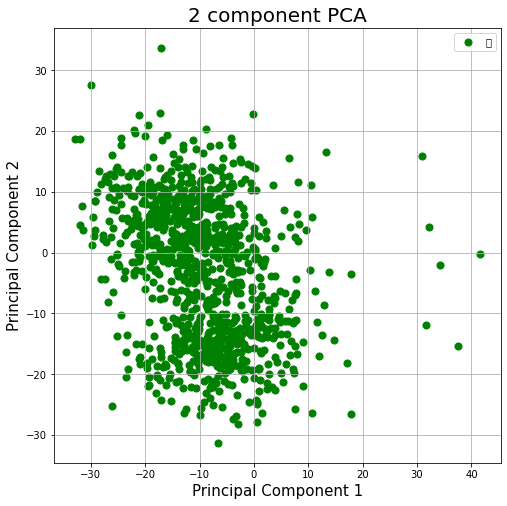

In [49]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['남', '여']
colors = ['g']
for target, color in zip(['여'],colors):
    indicesToKeep = df['성별/sex'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [41]:
from sklearn.decomposition import PCA
pca_num = 2
pca = PCA(n_components=pca_num)
principalComponents = pca.fit_transform(normalized_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = list(range(pca_num)))
principalDf
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
index_dic_feature = {
    12:"코너비",
    13:"입너비",
    14:"아래턱사이너비",
    15:"코높이",
    16:"코길이",
    18:"코뿌리턱끝수직길이",
    19:"코뿌리코끝수직길이",
    45:"귀구슬입술직선길이"
}
col_feature = list(index_dic_feature.values())
df = pd.DataFrame(data = pca.components_,columns = col_feature)
df.T

[[ 0.11096934  0.04191695  0.56136365  0.03771148  0.06638169  0.22079842
   0.1294817   0.77424382]
 [ 0.17210481  0.5377906  -0.60277766  0.00379355  0.19371617  0.47405076
   0.09616026  0.21519533]]
[236.92320505 123.4711925 ]
[0.47692013 0.24854423]
0.725464359200835


,0,1
코너비,0.110969,0.172105
입너비,0.041917,0.537791
아래턱사이너비,0.561364,-0.602778
코높이,0.037711,0.003794
코길이,0.066382,0.193716
코뿌리턱끝수직길이,0.220798,0.474051
코뿌리코끝수직길이,0.129482,0.096160
귀구슬입술직선길이,0.774244,0.215195
